# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [44]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

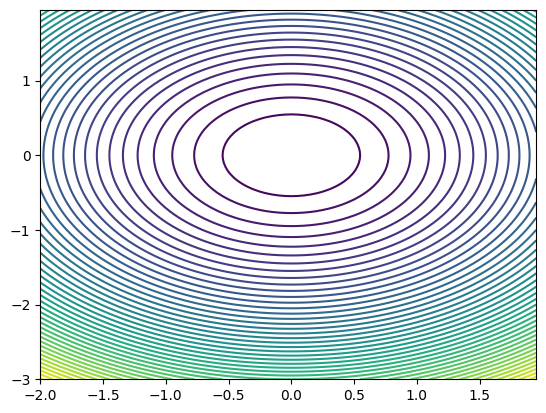

In [45]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

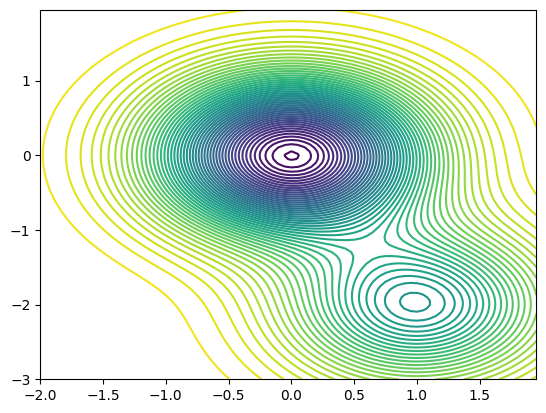

In [46]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [47]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        # self.trace =  None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_vale(self, x1:float, x2:float) -> float:
      return self.func(x1,x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
      return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
      func_grad = self.calculate_func_grad(x1, x2)
      new_x1 = x1 + self.alpha * (- func_grad[0]) # - func_grad -> direction of minimization of the function
      new_x2 = x2 + self.alpha * (- func_grad[1])
      return (new_x1, new_x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
      if verbose>1:
        print("Starting point coordinates: ",  x1_init,  x2_init)
      self.trace = np.array([[x1_init, x2_init]])
      for _ in range(steps):
        func_vale =  self.calculate_func_vale(x1_init, x2_init)
        if verbose>2:
          print("Function value: ", func_vale)
        (new_x1, new_x2) = self.gradient_descent_step(x1_init, x2_init)
        new_func_vale = self.calculate_func_vale(new_x1, new_x2)
        x1_init, x2_init = new_x1, new_x2
        if verbose>1:
          print("New starting point coordinates: ", new_x1, new_x2)

        self.trace = np.append(self.trace, np.array([[new_x1, new_x2]]), axis=0)

      if verbose>2:
          print("Trace of search: ", self. trace)
      if verbose>0:
        print("Final coordinates: x1, x2 = ", x1_init, x2_init)
        print("Found minimum (Function value): ", new_func_vale)



      if plot:
        self.plot_func()
      return new_func_vale

# Funkcja 1

In [48]:
def f_x(x1:float, x2:float) -> float:
  return x1**2 + x2**2

def f_x_grad(x1:float, x2:float) -> Tuple[float, float]:
  return (2*x1, 2*x2)

def test_plot(function, function_grad, random_x_y:bool=True, x_init:float=None, y_init:float=None, alpha:float=None, steps:int=10):
  if random_x_y:
    x_init = random.uniform(-2, 2)
    y_init = random.uniform(-3, 2)
  sgd = SimpleGradientDescent(function, function_grad, alpha)
  min = sgd.minimize(x_init, y_init, steps, plot=True)


steps = 10

print("Dla x, y losowych z zakresu x∈[-2,2], y∈[-3,2]")
for _ in range(3):
  print()
  for alpha in range(1, 11):

    alpha = alpha/10
    x_init = random.uniform(-2, 2)
    y_init = random.uniform(-3, 2)
    sgd = SimpleGradientDescent(f_x, f_x_grad, alpha)
    min = sgd.minimize(x_init, y_init, steps, plot=False)

    print("F. min: alpha =", alpha,"-->", min)


print("\nDla x,y dużych efekt jest taki sami:")
for alpha in range(1, 11):

    alpha = alpha/10
    x_init = random.uniform(-20000, 20000)
    y_init = random.uniform(-30000, 20000)
    sgd = SimpleGradientDescent(f_x, f_x_grad, alpha)
    min = sgd.minimize(x_init, y_init, steps, plot=False)

    print("F. min: alpha =", alpha," -->", min)

Dla x, y losowych z zakresu x∈[-2,2], y∈[-3,2]

F. min: alpha = 0.1 --> 0.05783604234414626
F. min: alpha = 0.2 --> 3.0017298196607907e-05
F. min: alpha = 0.3 --> 6.094815269596816e-08
F. min: alpha = 0.4 --> 6.73466822558842e-14
F. min: alpha = 0.5 --> 0.0
F. min: alpha = 0.6 --> 1.2392900894039386e-14
F. min: alpha = 0.7 --> 8.713571028083185e-09
F. min: alpha = 0.8 --> 0.00015179077919937102
F. min: alpha = 0.9 --> 0.030752085551775228
F. min: alpha = 1.0 --> 2.7661473438126647

F. min: alpha = 0.1 --> 0.005904366357479898
F. min: alpha = 0.2 --> 0.00011918264413229629
F. min: alpha = 0.3 --> 2.3666967967898552e-08
F. min: alpha = 0.4 --> 1.9862749096697005e-15
F. min: alpha = 0.5 --> 0.0
F. min: alpha = 0.6 --> 1.541332045893154e-14
F. min: alpha = 0.7 --> 2.4334318740545315e-08
F. min: alpha = 0.8 --> 0.00013075910689552145
F. min: alpha = 0.9 --> 0.04706488254075196
F. min: alpha = 1.0 --> 3.7453684669176126

F. min: alpha = 0.1 --> 0.00401124688085093
F. min: alpha = 0.2 --> 0.0

Wykres dla alpha = 0.5 i x, y losowych z zakresu x∈[-2,2], y∈[-3,2]
Wniosek: Dla tej funkcji nalepiej sprawdza się długość kroku alpha=0.5


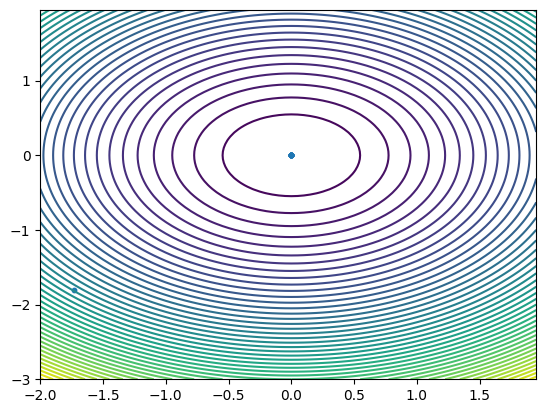

In [49]:
print("Wykres dla alpha = 0.5 i x, y losowych z zakresu x∈[-2,2], y∈[-3,2]")
test_plot(f_x, f_x_grad, alpha=0.5)
print("Wniosek: Dla tej funkcji nalepiej sprawdza się długość kroku alpha=0.5")

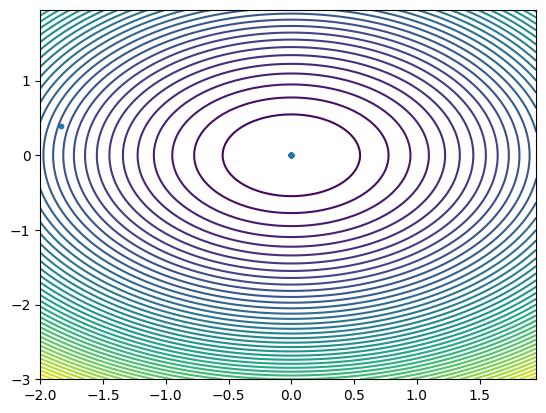

In [50]:
test_plot(f_x, f_x_grad, alpha=0.5)

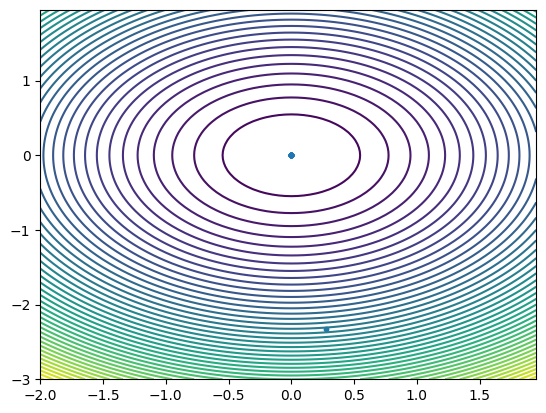

In [51]:
test_plot(f_x, f_x_grad, alpha=0.5)

# Funkcja 2

In [52]:
def g_x(x1:float, x2:float) -> float:
  return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

def g_x_grad(x1:float, x2:float) -> Tuple[float, float]:
  return (2*x1 * np.exp(-x1**(2) - x2**(2)) + (x1 - 1)* np.exp(-(x1-1)**(2) - (x2 +2)**(2)),
    2*x2 * np.exp(-x1**(2) - x2**(2)) + (x2 + 2)* np.exp(-(x1-1)**(2) - (x2 +2)**(2)))


In [53]:
def find_best_alpha(steps):
  print("Dla x, y losowych z zakresu x∈[-2,2], y∈[-3,2], dla aplha∈[0.01,1.00] dla", steps, "kroków")
  best_alphas = []
  for _ in range(10):
    temp_min = 10

    for alpha in range(1, 101):

      alpha = alpha/100
      x_init = random.uniform(-2, 2)
      y_init = random.uniform(-3, 2)
      sgd = SimpleGradientDescent(g_x, g_x_grad, alpha)
      min = sgd.minimize(x_init, y_init, steps, plot=False)


      if min < temp_min:
        temp_min = min
        best_alpha = alpha

    best_alphas.append(best_alpha)
    print("F. min: najlepsze alpha =", best_alpha,"-->", temp_min)
  print("Wniosek: Dla tej funkcji dla",  steps, " kroków, nalepiej sprawdza się długość kroku około:", np.mean(best_alphas))



In [54]:
find_best_alpha(steps=100)

Dla x, y losowych z zakresu x∈[-2,2], y∈[-3,2], dla aplha∈[0.01,1.00] dla 100 kroków
F. min: najlepsze alpha = 0.14 --> 0.4965724836763416
F. min: najlepsze alpha = 0.1 --> 0.4965724836763416
F. min: najlepsze alpha = 0.1 --> 0.4965724836763416
F. min: najlepsze alpha = 0.1 --> 0.4965724836763416
F. min: najlepsze alpha = 0.16 --> 0.4965724836763416
F. min: najlepsze alpha = 0.15 --> 0.4965724836763416
F. min: najlepsze alpha = 0.53 --> 0.49657248367634155
F. min: najlepsze alpha = 0.13 --> 0.4965724836763416
F. min: najlepsze alpha = 0.11 --> 0.4965724836763416
F. min: najlepsze alpha = 0.09 --> 0.4965724836763416
Wniosek: Dla tej funkcji dla 100  kroków, nalepiej sprawdza się długość kroku około: 0.16100000000000003


In [55]:
find_best_alpha(steps=1000)


Dla x, y losowych z zakresu x∈[-2,2], y∈[-3,2], dla aplha∈[0.01,1.00] dla 1000 kroków
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.03 --> 0.4965724836763416
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.01 --> 0.4965724836763416
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.03 --> 0.4965724836763416
F. min: najlepsze alpha = 0.02 --> 0.4965724836763416
F. min: najlepsze alpha = 0.03 --> 0.4965724836763416
Wniosek: Dla tej funkcji dla 1000  kroków, nalepiej sprawdza się długość kroku około: 0.022


Jak widać w zależności od liczby kroków optymalne alpha wychodzą różne. Dzieje się tak ponieważ, jak  możemy zaobserwować, wartość gradientu nie jest stała lub liniowa w kierunku minimum. Daleko od minimum jest bardzo mała wartość dlatego liczba i wartość kroków powinna być duża żeby ją pokonać, następnie blisko minimum robi się wględnie duża (np. dla współrzędnych 0.7,0.7). Taka sytuacja sprzyja "zygzakowaniu" dla za dużych kroków, dlatego ciężko tu przyjąć stałe alpha, ponieważ daleko od minimum potrzebujemy dużych kroków a blisko bardzo małych.
Im mamy mniejsze alpha tym będziemy zygzakować bliżej minimum.

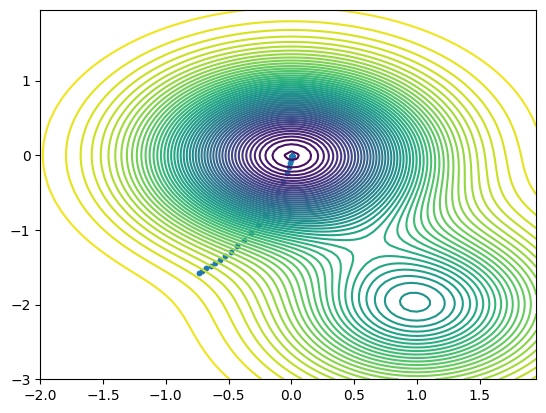

In [64]:
test_plot(alpha= 0.2, function=g_x, function_grad=g_x_grad, steps=100)

Losowe punkty niestety mogą też poprowadzić do minimu lokalnego


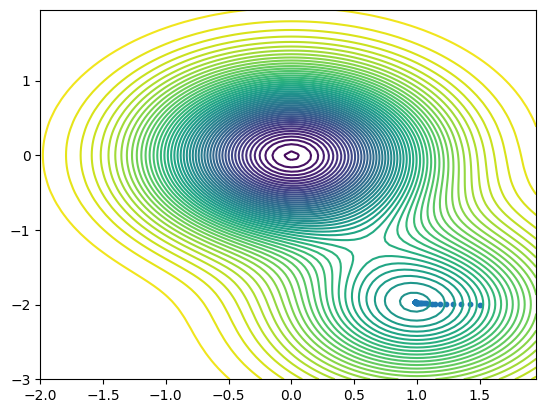

In [57]:
print("Losowe punkty niestety mogą też poprowadzić do minimu lokalnego")
test_plot(g_x, g_x_grad, alpha = 0.2, x_init = 1.5, y_init = -2, steps=100, random_x_y=False)



Dla punktów gdzie grandient ma BARDZO małe wartości trzeba by było zastosować bardzo duże kroki oraz koniecznie mechanizm redukcji kroku,
 aby zapobiec "przeskoczeniu" minimum, ponieważ inaczej bardzo ciężko będzie metodzie będzie przejść przez obszar o małej wartości gradientu, 
 jak widać na rysunku dla 10^5 kroków o bardzo dużego alpha = 10^3


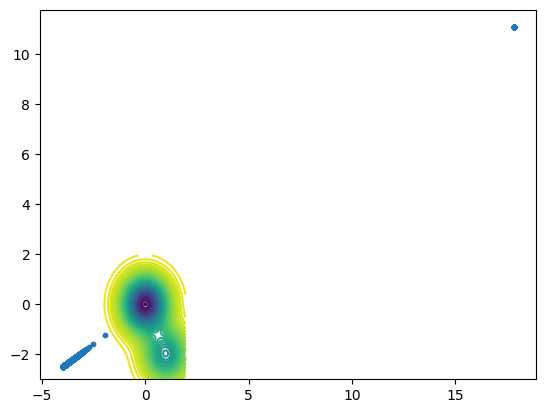

In [58]:
print("\n\nDla punktów gdzie grandient ma BARDZO małe wartości trzeba by było zastosować bardzo duże kroki oraz koniecznie mechanizm redukcji kroku,\n aby zapobiec"
,'"przeskoczeniu"', "minimum, ponieważ inaczej bardzo ciężko będzie metodzie będzie przejść przez obszar o małej wartości gradientu,",
"\n jak widać na rysunku dla 10^5 kroków o bardzo dużego alpha = 10^3")
test_plot(g_x, g_x_grad, False, -4,-2.5,  alpha=10**3, steps=10**5)


Verbose:

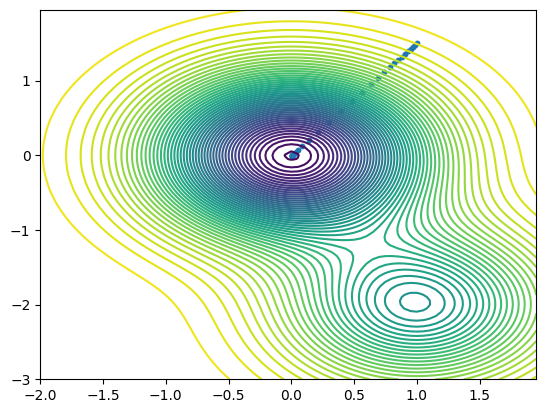

In [59]:
sgd = SimpleGradientDescent(g_x, g_x_grad, alpha=0.2)
min = sgd.minimize(1,1.5, steps=10*3,verbose=0, plot=True)

Final coordinates: x1, x2 =  0.0037406019969641784 -0.006401527804548492
Found minimum (Function value):  0.49657285315126987


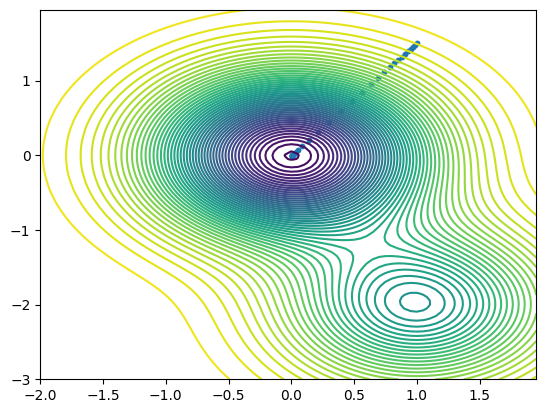

In [60]:
sgd = SimpleGradientDescent(g_x, g_x_grad, alpha=0.2)
min = sgd.minimize(1,1.5, steps=10*3,verbose=1, plot=True)

Starting point coordinates:  1 1.5
New starting point coordinates:  0.9844903168673111 1.4767321257187922
New starting point coordinates:  0.9676146400929077 1.4514147289704946
New starting point coordinates:  0.9491536840271261 1.4237187424192048
New starting point coordinates:  0.928837695828556 1.3932393468330175
New starting point coordinates:  0.906331702232702 1.3594738165102425
New starting point coordinates:  0.881215851864345 1.3217919929370363
New starting point coordinates:  0.8529593653233728 1.2793971437509317
New starting point coordinates:  0.8208866624953549 1.231275039847727
New starting point coordinates:  0.7841353619238267 1.1761307509813077
New starting point coordinates:  0.7416100775309189 1.112318962463363
New starting point coordinates:  0.6919484064621126 1.0377922242337132
New starting point coordinates:  0.6335481009454412 0.9501402368413067
New starting point coordinates:  0.5647799424679699 0.8469061352349301
New starting point coordinates:  0.484650161192

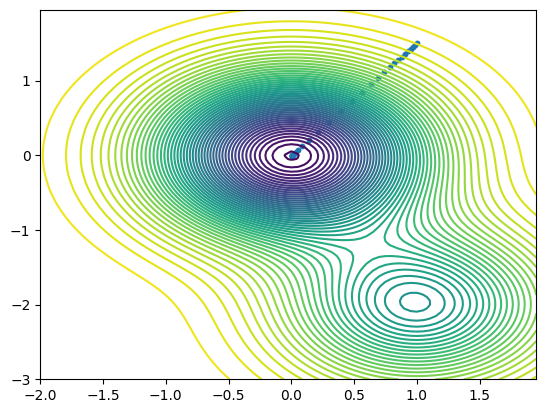

In [61]:
sgd = SimpleGradientDescent(g_x, g_x_grad, alpha=0.2)
min = sgd.minimize(1,1.5, steps=10*3,verbose=2, plot=True)

Starting point coordinates:  1 1.5
Function value:  1.461223399609582
New starting point coordinates:  0.9844903168673111 1.4767321257187922
Function value:  1.4571433006603294
New starting point coordinates:  0.9676146400929077 1.4514147289704946
Function value:  1.4522994603889954
New starting point coordinates:  0.9491536840271261 1.4237187424192048
Function value:  1.4464849389961654
New starting point coordinates:  0.928837695828556 1.3932393468330175
Function value:  1.4394189606222407
New starting point coordinates:  0.906331702232702 1.3594738165102425
Function value:  1.4307142801637056
New starting point coordinates:  0.881215851864345 1.3217919929370363
Function value:  1.4198276195279094
New starting point coordinates:  0.8529593653233728 1.2793971437509317
Function value:  1.4059835589576497
New starting point coordinates:  0.8208866624953549 1.231275039847727
Function value:  1.38805714899903
New starting point coordinates:  0.7841353619238267 1.1761307509813077
Function 

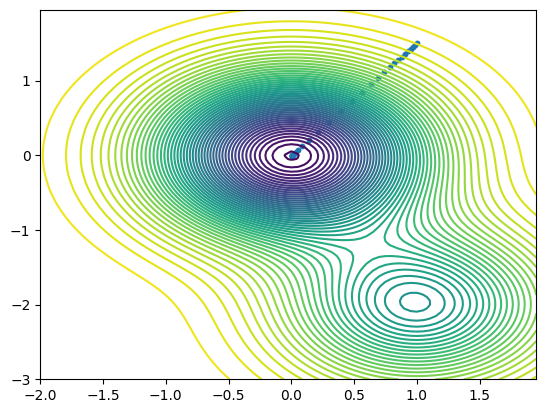

In [62]:
sgd = SimpleGradientDescent(g_x, g_x_grad, alpha=0.2)
min = sgd.minimize(1,1.5, steps=10*3,verbose=3, plot=True)